<font color="Teal" face="Arial">
  <h1 align="center"><i>Métodos Cuantitativos</i></h1>
  </font>
  <font color="Black" face="Arial">
  <h5 align="center"><i>Maximino Jiménez Robles</i></h5>
  <h5 align="center"><i>Ayudantía</i></h5>
  </font>

# VaR (Value at Risk)
El valor en riesgo es un a teoría creada para la administración del riesgo financiero de una empresa. Estos riesgos son aquellos que provienen de posibles pérdidas en el mercado financiero, por ejemplo: variaciones de activos, tasas de interés, etc. Todos esos riesgos, que son los que trata de administrar la teoría del VaR pueden subdividirse en:



* Riesgo de mercado: movimientos en los niveles o volatilidad en los precios de mercado.
* Riesgo de crédito: posibilidad de que la contraparte se niegue o no pueda cumplir con los compromisos de pagos que adquirió en el pasado.
* Riesgo de liquidez: este riesgo puede dividirse en dos, por una parte que sea difícil liquidar los activo al precio correspondiente (puede ser debido al tamaño de la posición por ejemplo), por lo que haya que disminuir su precio para deshacerse del activo. Por otro lado el hecho de tener que liquidar tempranamente una posición para así poder cumplir con las obligaciones de pago.
* Riesgo operacional: viene dado por posibles errores técnicos o humanos.
* Riesgo Legal: eventualidad de que un contrato no se pueda hacer cumplir legalmente.





# VaR
Es una estadística que cuantifica el alcance de las posibles pérdidas financieras dentro de una empresa, cartera o posición durante un período de tiempo específico.

Los gestores de riesgos utilizan el VaR para medir y controlar el nivel de exposición al riesgo. 

1.   El valor en riesgo (VaR) es una forma de cuantificar el riesgo de pérdidas potenciales para una empresa o una inversión.
2.   Esta métrica se puede calcular de varias maneras, incluidos los métodos histórico, de varianza-covarianza y de Monte Carlo.
3.   Los bancos de inversión suelen aplicar modelos de VaR al riesgo de toda la empresa debido a la posibilidad de que las mesas de negociación independientes expongan involuntariamente a la empresa a activos altamente correlacionados.












# VaR histórico
El método histórico, analiza el historial de rendimientos anteriores y los ordena desde las peores pérdidas hasta las mayores ganancias, partiendo de la premisa de que la experiencia de rendimientos pasados ​​informará los resultados futuros.

Pasos:
1.   Se elige un periodo de tiempo de información histórica con tamaño de $N$ observaciones.
2.   Se calculan los $N-1$ rendimientos periódicos de la muestra seleccionada. Estos rendimientos pueden calcularse de forma logarítmica o aritmética.
$$\mbox{Logarítmico: }r_t=ln\left ( \frac{P_t}{P_{t-1}} \right )$$
$$\mbox{Aritmético: }r_t=\frac{P_t-P_{t-1}}{P_{t-1}}$$
Donde:
>>$r_t$ es el rendimiento al tiempo t y $P_t$ es el precio al timpo t.
3.   Se calculan las $N-1$ rentabilidades
$$L_t=V*r_t$$
$$V=P_{\mbox{Fecha de Valuación}}*\mbox{No. Títulos}$$
Donde:
>>
$L_t$ es la rentabilidad.$V$ es el valor de mercado del portafolio en la fecha $t$ y $r_t$ es el rendimiento al tiempo $t$.
4.   Se ordenan las rentabilidades del menor al mayor $L_{(1)},\cdots,L_{(N-1)}$ y se escoge la rentabilidad $L_{(j^*)}$ tal que:
$$\frac{j^*-1}{N-1}\leq 1-\alpha\leq\frac{j^*}{N-1}$$
5.   Entonces el VaR Histórico nos queda:
$$VaR(\alpha)=L_{(j^*)}$$


# Ejemplo Introductorio y manual

Se tiene un activo para el cual sus rendimiento son diarios y se muestran a continuación:

In [1]:
rendimientos = [-0.10,-0.08,-0.05,-0.04,0.01,-0.03,-0.02,-0.02,0.03,0.021,0.022,0.05,0.06,0.015,0.02,0.03,0.06,0.01,0.01,0.02]

¿Si se tiene un intervalo de confianza al 80% cuál es la pérdida esperada?

In [2]:
# 1
len(rendimientos)

20

In [3]:
# 2 y 3 : es calcular los rendimientos y rentabilidad, pero como ya los tenemos calculados 
# no hay necesidad

# 4 Ordenamos de menor a mayor
ordenados = sorted(rendimientos)
print(ordenados)

[-0.1, -0.08, -0.05, -0.04, -0.03, -0.02, -0.02, 0.01, 0.01, 0.01, 0.015, 0.02, 0.02, 0.021, 0.022, 0.03, 0.03, 0.05, 0.06, 0.06]


Porcentaje = 20%
Número total de datos = 20 (la longitud de la lista)

Número de datos al 20% = (20/100) * 20 = 2

In [4]:
(20/100)*20

4.0

In [5]:
print(f"El cuantil al 20% es {ordenados[3]}")

El cuantil al 20% es -0.04


In [6]:
import numpy as np

In [7]:
cuantil_20 = np.percentile(ordenados, 20)
print("El cuantil al 20% es:", cuantil_20)

El cuantil al 20% es: -0.031999999999999994


Si deseas obtener resultados consistentes con numpy.percentile(), puedes especificar la interpolación lineal al calcular el cuantil con Pandas de la siguiente manera:

In [8]:
import pandas as pd

In [9]:
ordenados = pd.Series(rendimientos)

In [10]:
cuantil_20_pandas = ordenados.quantile(0.2, interpolation='linear')
cuantil_20_pandas

np.float64(-0.031999999999999994)

In [11]:
cuantil_20_pandas = ordenados.quantile(0.2, interpolation='nearest')
cuantil_20_pandas

np.float64(-0.03)

In [12]:
cuantil_20_pandas = ordenados.quantile(0.2, interpolation='lower')
cuantil_20_pandas

np.float64(-0.04)

In [13]:
cuantil_20_pandas = ordenados.quantile(0.2, interpolation='higher')
cuantil_20_pandas

np.float64(-0.03)

In [14]:
cuantil_20_pandas = ordenados.quantile(0.2, interpolation='midpoint')
cuantil_20_pandas

np.float64(-0.035)

**Si suponemos una inversón en ese activo de $1,000 dólares, entonces el VaR al 80% es de:**

In [15]:
VaR = 1000*(0.04)
print(f"El valor en riesgo es de ${VaR} dólares")

El valor en riesgo es de $40.0 dólares


**Es decir, existe una probabilidad del 20% de perder al menos 40 dólares(es equivalente decir que existe una proba del 20% de que las pérdidas superen los 40 dólares), o bien 2 de cada 10 días se va a perder por lo menos 40 dólares**

# Código con precios online

In [16]:
# !pip install yfinance
#Importamos las librerias
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.stats import norm

In [17]:
#-------------------------------PASO 1-----------------------------------------

#Enlistamos las etiquetas de las acciones, en este caso solo lo ocuparemos 
#para dos podrían ser más y sería de la misma manera.
tickers = ("AMD", "XOM")

#Asignamos las fechas con las que trabajaremos, una de inicio y final
fecha_inicio = '2022-01-03'
fecha_final = '2023-10-03'

#Jalamos los datos a utilizar por medio de la API que se conecta a Yahoo Finance
#utilizando el método de pandas datareader
data0 = yf.download(tickers, start=fecha_inicio, end=fecha_final, auto_adjust=True, ignore_tz=True)["Close"]

#Imprimimos los primeros 5 datos para ver si se hizo de manera correcta
data0.head(5)

[*********************100%***********************]  2 of 2 completed


Ticker,AMD,XOM
Date,,
2022-01-03,150.240005,55.607399
2022-01-04,144.419998,57.699013
2022-01-05,136.149994,58.416645
2022-01-06,136.229996,59.790634
2022-01-07,132.000000,60.280716


In [18]:
#Creamos las columnas de los rendimientos y las llenamos con ceros
data0['Rendimientos AMD'] = np.zeros(len(data0))
data0['Rendimientos XOM'] = np.zeros(len(data0))
#-------------------------------------PASO 2------------------------------------
#Calculamos los rendimientos logaritmicos
for i in range(1, len(data0)):
    data0.iloc[i, 2] = np.log(data0.iloc[i, 0]/data0.iloc[i-1, 0])
    data0.iloc[i, 3] = np.log(data0.iloc[i, 1]/data0.iloc[i-1, 1])
data0.head()

Ticker,AMD,XOM,Rendimientos AMD,Rendimientos XOM
Date,,,,
2022-01-03,150.240005,55.607399,0.000000,0.000000
2022-01-04,144.419998,57.699013,-0.039508,0.036924
2022-01-05,136.149994,58.416645,-0.058969,0.012361
2022-01-06,136.229996,59.790634,0.000587,0.023248
2022-01-07,132.000000,60.280716,-0.031543,0.008163


In [19]:
#Supongamos que tenemos un portafolio de 5 millones invertidos en las 
#siguientes acciones
valor_amd = 3.5 #millones de USD
valor_xom = 1.5 #millones de USD

In [20]:
#-------------------------------PASO 3-------------------------------

#Calculamos las rentabilidades en función de nuestro portafolio
data0['Rentabilidades AMD'] = data0['Rendimientos AMD']*valor_amd
data0['Rentabilidades XOM'] = data0['Rendimientos XOM']*valor_xom

#Imprimimos los primeros 
data0.head(5)

Ticker,AMD,XOM,Rendimientos AMD,Rendimientos XOM,Rentabilidades AMD,Rentabilidades XOM
Date,,,,,,
2022-01-03,150.240005,55.607399,0.000000,0.000000,0.000000,0.000000
2022-01-04,144.419998,57.699013,-0.039508,0.036924,-0.138279,0.055386
2022-01-05,136.149994,58.416645,-0.058969,0.012361,-0.206390,0.018541
2022-01-06,136.229996,59.790634,0.000587,0.023248,0.002056,0.034872
2022-01-07,132.000000,60.280716,-0.031543,0.008163,-0.110399,0.012245


In [21]:
#-------------------------------PASO 3-------------------------------
#Calculamos las rentabilidades en función de nuestro portafolio
data0['Rentabilidades AMD'] = data0['Rendimientos AMD']*valor_amd
data0['Rentabilidades XOM'] = data0['Rendimientos XOM']*valor_xom

#Imprimimos los primeros
data0.head(5)

Ticker,AMD,XOM,Rendimientos AMD,Rendimientos XOM,Rentabilidades AMD,Rentabilidades XOM
Date,,,,,,
2022-01-03,150.240005,55.607399,0.000000,0.000000,0.000000,0.000000
2022-01-04,144.419998,57.699013,-0.039508,0.036924,-0.138279,0.055386
2022-01-05,136.149994,58.416645,-0.058969,0.012361,-0.206390,0.018541
2022-01-06,136.229996,59.790634,0.000587,0.023248,0.002056,0.034872
2022-01-07,132.000000,60.280716,-0.031543,0.008163,-0.110399,0.012245


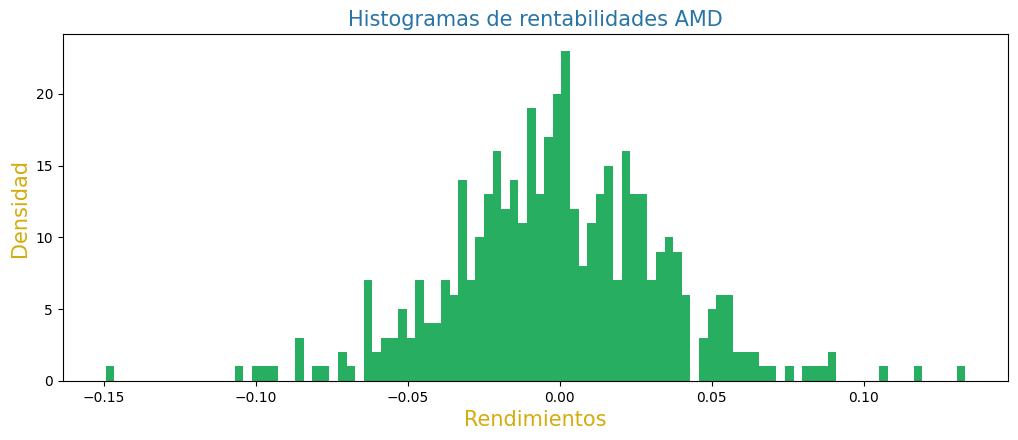

In [22]:
plt.figure(figsize=(12.2,4.5)) #Largo y acnho del gráfico
plt.hist(data0['Rendimientos AMD'], bins = 100, color = '#27AE60')
plt.title('Histogramas de rentabilidades AMD',fontsize=15, color = '#2874A6')
plt.ylabel('Densidad',fontsize=15, color = '#D4AC0D')
plt.xlabel('Rendimientos',fontsize=15,color = '#D4AC0D')
plt.show()

In [23]:
#----------------------PASO 4 y 5-----------------------------
#Calculamos al 95% y 99% de confianza las rentabilidades
cuantil_amd_95 = data0.quantile(q=0.05, axis=0).iloc[-2]
cuantil_xom_95 = data0.quantile(q=0.05, axis=0).iloc[-1]

cuantil_amd_99 = data0.quantile(q=0.01, axis=0).iloc[-2]
cuantil_xom_99 = data0.quantile(q=0.01, axis=0).iloc[-1]


In [24]:
round(cuantil_amd_95,5)

np.float64(-0.20365)

In [25]:
round(cuantil_xom_95,5)

np.float64(-0.04787)

In [26]:
round(cuantil_amd_99,5)

np.float64(-0.3195)

In [27]:
round(cuantil_xom_95,5)

np.float64(-0.04787)

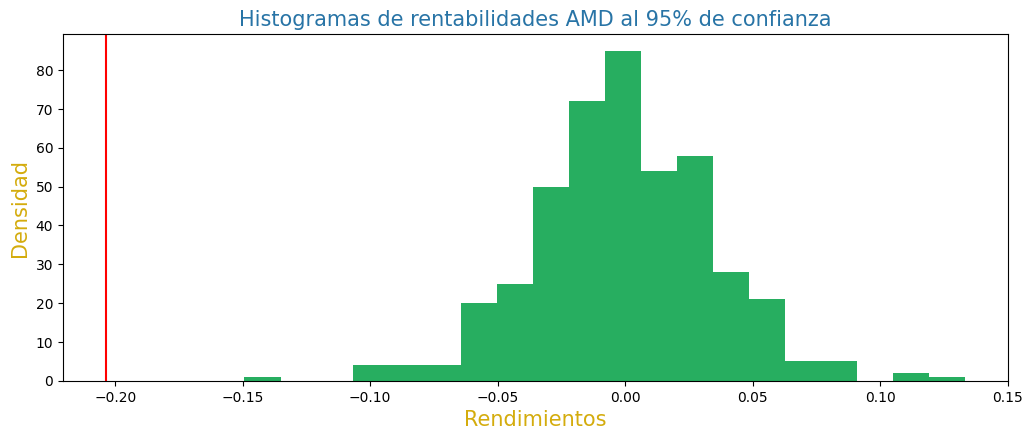

In [28]:
plt.figure(figsize=(12.2,4.5)) #Largo y acnho del gráfico
plt.hist(data0['Rendimientos AMD'], bins = 20, color = '#27AE60')
plt.title('Histogramas de rentabilidades AMD al 95% de confianza',fontsize=15, color = '#2874A6')
plt.ylabel('Densidad',fontsize=15, color = '#D4AC0D')
plt.xlabel('Rendimientos',fontsize=15,color = '#D4AC0D')
plt.axvline(x=cuantil_amd_95, color="r")
plt.show()

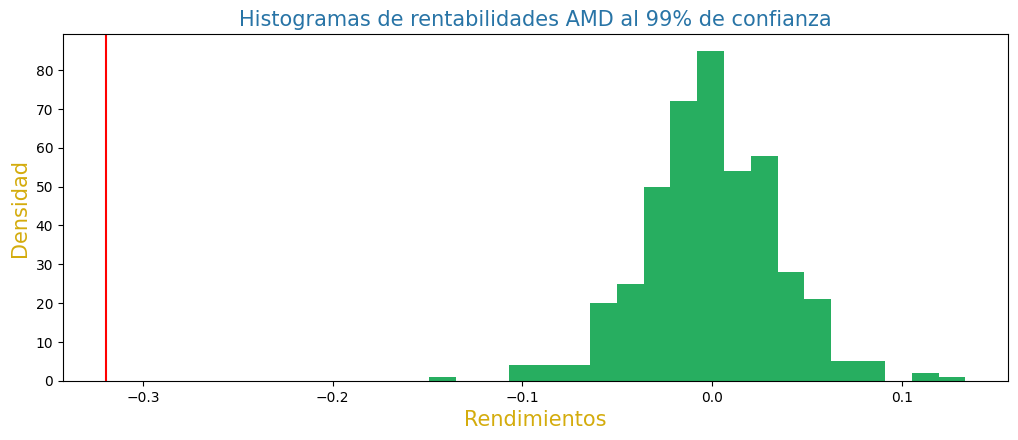

In [29]:
plt.figure(figsize=(12.2,4.5)) #Largo y acnho del gráfico
plt.hist(data0['Rendimientos AMD'], bins = 20, color = '#27AE60')
plt.title('Histogramas de rentabilidades AMD al 99% de confianza',fontsize=15, color = '#2874A6')
plt.ylabel('Densidad',fontsize=15, color = '#D4AC0D')
plt.xlabel('Rendimientos',fontsize=15,color = '#D4AC0D')
plt.axvline(x=cuantil_amd_99, color="r")
plt.show()

In [30]:
data0['Rentabilidades AMD'].min()

np.float64(-0.522545801429881)

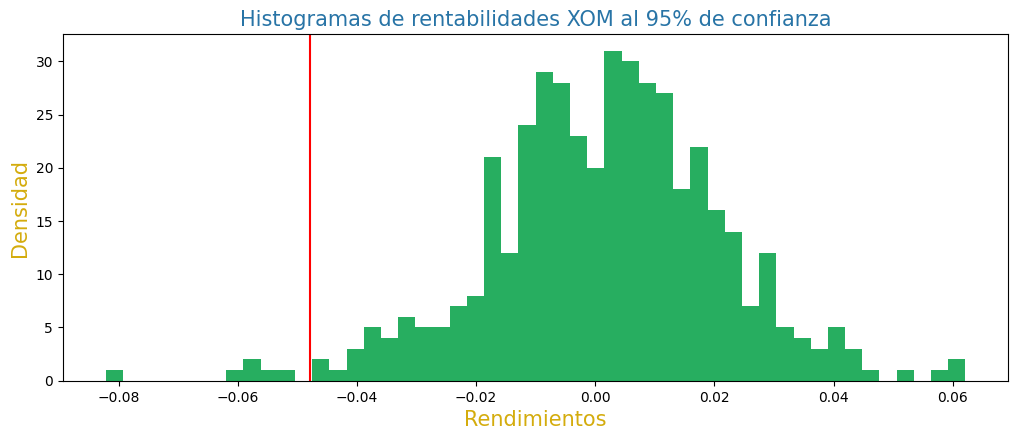

In [31]:
plt.figure(figsize=(12.2,4.5)) #Largo y acnho del gráfico
plt.hist(data0['Rendimientos XOM'], bins = 50, color = '#27AE60')
plt.title('Histogramas de rentabilidades XOM al 95% de confianza',fontsize=15, color = '#2874A6')
plt.ylabel('Densidad',fontsize=15, color = '#D4AC0D')
plt.xlabel('Rendimientos',fontsize=15,color = '#D4AC0D')
plt.axvline(x=cuantil_xom_95, color="r")
plt.show()

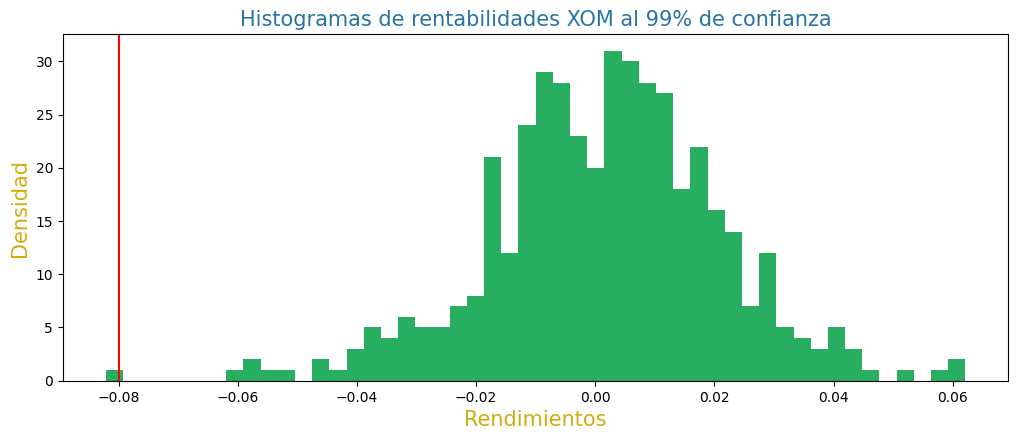

In [32]:
plt.figure(figsize=(12.2,4.5)) #Largo y acnho del gráfico
plt.hist(data0['Rendimientos XOM'], bins = 50, color = '#27AE60')
plt.title('Histogramas de rentabilidades XOM al 99% de confianza',fontsize=15, color = '#2874A6')
plt.ylabel('Densidad',fontsize=15, color = '#D4AC0D')
plt.xlabel('Rendimientos',fontsize=15,color = '#D4AC0D')
plt.axvline(x=cuantil_xom_99, color="r")
plt.show()

In [33]:
#Calculamos el VaR Histórico al 95% de confianza
print("El VaR Histórico de AMD nos dice que existe un 5% de probabilidad de perder al menos:", 
      round(cuantil_amd_95, 2)*-1, "millones de USD, y un 95% de que la pérdida sea menor a eso.")
print("El VaR Histórico de XOM al 95% es", 
      round(cuantil_xom_95, 2), "millones de USD")

#Calculamos el VaR Histórico al 99% de confianza
print("El VaR Histórico de AMD al 99% es", 
      round(cuantil_amd_99, 2), "millones de USD")
print("El VaR Histórico de XOM nos dice que existe un 1% de probabilidad de perder al menos:", 
      round(cuantil_xom_99, 2)*-1, "millones de USD, y un 99% de que la pérdida sea menor a eso")

El VaR Histórico de AMD nos dice que existe un 5% de probabilidad de perder al menos: 0.2 millones de USD, y un 95% de que la pérdida sea menor a eso.
El VaR Histórico de XOM al 95% es -0.05 millones de USD
El VaR Histórico de AMD al 99% es -0.32 millones de USD
El VaR Histórico de XOM nos dice que existe un 1% de probabilidad de perder al menos: 0.08 millones de USD, y un 99% de que la pérdida sea menor a eso


# VaR paramétrico
El segundo es el método de varianza-covarianza o también conocido como paramétrico. En lugar de asumir que el pasado informará el futuro, este método asume que las ganancias y pérdidas se distribuyen normalmente . De esta forma, las pérdidas potenciales se pueden enmarcar en términos de eventos de desviación estándar de la media.

Este enfoque implica la estimación de parámetros en lugar de la simple lectura del cuantil de una distribución empírica (VaR Histórico).

Supongamos que las variaciones de un portafolio se distribuyen $X\sim N(\mu,\sigma^2)$, entonces transformándolo en una Normal Estándar nos queda $Z=\frac{X-\mu}{\sigma}\sim N(0,1)$

Sabemos que el VaR satisface la siguiente ecuación:
$$\mathbb{P}(X\leq VaR)=1-\alpha$$
Entonces,
$$\mathbb{P}(X\leq VaR)=\mathbb{P}\left ( \frac{X-\mu}{\sigma}\leq\frac{VaR-\mu}{\sigma} \right )=\mathbb{P}\left ( Z\leq\frac{VaR-\mu}{\sigma} \right )=\Phi\left ( \frac{VaR-\mu}{\sigma} \right )=1-\alpha$$
$$\Rightarrow\frac{VaR-\mu}{\sigma}=\Phi^{-1}(1-\alpha)$$
$$\Rightarrow VaR=\sigma*\Phi^{-1}(1-\alpha)+\mu$$

In [35]:
#Calculamos las medias de las rentabilidades, las mu
promedio_amd = data0.mean().iloc[-2]
promedio_xom = data0.mean().iloc[-1]

#Calculamos las desviaciones estándar de las rentabilidades 
desvest_amd = data0.std().iloc[-2]
desvest_xom = data0.std().iloc[-1]

#Calculamos el inverso de la distribución normal estándar  
#acumulativa para los niveles de confianza del 95% y 99%
#La función norm.ppf() nos ayuda a calcular la función de 
#distibución acumulativa inversa en q de la razón de verosimilitud dado
phi_95 = norm.ppf(0.05)
phi_99 = norm.ppf(0.01)

#Calculamos el VaR Paramétrico al 95% y 99% de confianza
VaR_amd_95 = desvest_amd*phi_95+promedio_amd
VaR_xom_95 = desvest_xom*phi_95+promedio_xom
VaR_amd_99 = desvest_amd*phi_99+promedio_amd
VaR_xom_99 = desvest_xom*phi_99+promedio_xom

In [36]:
#Calculamos el VaR Paramétrico al 95% de confianza
print("El VaR Paramétrico de AMD al 95% es", 
      round(VaR_amd_95, 2), "millones de USD")
print("El VaR Paramétrico de XOM al 95% es", 
      round(VaR_xom_95, 2), "millones de USD")

#Calculamos el VaR Paramétrico al 99% de confianza
print("El VaR Paramétrico de AMD al 99% es", 
      round(VaR_amd_99, 2), "millones de USD")
print("El VaR Paramétrico de XOM al 99% es", 
      round(VaR_xom_99, 2), "millones de USD")

El VaR Paramétrico de AMD al 95% es -0.21 millones de USD
El VaR Paramétrico de XOM al 95% es -0.05 millones de USD
El VaR Paramétrico de AMD al 99% es -0.29 millones de USD
El VaR Paramétrico de XOM al 99% es -0.07 millones de USD


# LIMITACIONES DEL VaR
1. Suposición de normalidad es inadecuada para la medición de riesgo en las colas de la distribución. En un mercado heterocedástico, la varianza no es un múltiplo del horizonte temporal y, por ejemplo, la varianza semanal no tiene relación con la varianza diaria.
2.  Riesgo de liquidez: El VaR no tiene en cuenta que el riego de liquidez puede ser el mayor riesgo en algunos mercados. Es por eso que deben escoger activos con mucho volúmen.
3. Cambio de parámetros en momentos de tensión: Tanto la diversificación, como la correlación entre activos falla en los momentos de tensión. 
4. Problema sobre el cálculo de la volatilidad: La volatilidad no es observable, por lo que siempre se hace necesario estimarla.
5. Instrumentos no lineales: Los derivados presentan una no linealidad que dificulta el cálculo del VaR. No existe ningún tipo de convención que establezca de que forma se debe calcular el VaR en carteras con estas posiciones.
